In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def adjacency_maker(row):
    """Constructing a circulant adjacency matrix from a row.
    Shifting the row cyclically one position to the right in 
    order to obtain successive rows.
    Parameters
    ----------
    row : ndarray
        The first row of the matrix
    Returns
    -------
    adjacency_matrix : circulant adjacency matrix
    """
    
    #initialization of the matrix
    N = len(row)
    adjacency_matrix = np.zeros((N,N))
    
    #shifting the input row to the right 
    for z in range(N):
        adjacency_matrix[z,:] = np.roll(row,z)
        
    return(adjacency_matrix)

In [3]:
def hierarchical_connectivities(base,n,m):
    """Construction of the hierarchical network connectivity. 
    Parameters
    ----------
    base : ndarray
        The base pattern is containing zeros and non-zero values.
    n : int
        The last hierarchical step which defines the size of the resulting network
    m : int
        The number of hierarchical steps (m <= n).
    Returns
    -------
    C    : Coupling matrix (Adjacency matrix).
    c_nm : The number of links for the network at hierarchical step m.
    """
    
    #converting base to boolean
    base = np.array(base).astype('bool')
    
    #length of the base pattern
    b = len(base)
    
    #The number of ones in the base pattern and the number of links in the network.
    c_1 = np.count_nonzero(base)
    c_nm = (c_1**m) * (b**(n-m))
    
    #initialization of the row of the coupling matrix
    row = list(np.copy(base))
    
    #performing the fractal construction algorithm of a Cantor set
    for i in range(1,m):
        temp = []
        for j in range(len(row)):
            if row[j]:
                temp = temp + list(base)
            if not row[j]:
                temp = temp + ([False]*len(base))
        row = list(np.copy(temp))
    

    if m < n:
        final_n = b**(n-m)
        temp = []
        for j in range(len(row)):
            if row[j]:
                temp = temp + ([True]*final_n)
            if not row[j]:
                temp = temp + ([False]*final_n)
        row = list(np.copy(temp))
    
    #adding an additional zero corresponds to the self-coupling
    row.insert(0,False) 
    
    #constructing the coupling matrix
    C = adjacency_maker(row)
    
    return(C, c_nm)

In [4]:
def logisticmap(x, a):
    return x * a * (1 - x)

In [5]:
def timeseries_maker(C, T, a, c_nm, sigma):
    N = C.shape[0]
    data = np.zeros((T,N))
    data[0,:] = np.random.random((1,N))
    for i in range(N):
        for j in range(1, T):
            data[j,i] = logisticmap(data[j-1,i], a) + (sigma/c_nm)*np.matmul((np.array([logisticmap(data[j-1,i], a)]*N) 
                                               - np.array(list(map(lambda d: logisticmap(d, a), 
                                                                   list(data[j-1,:]))))),C[i,:])
    return(data)

In [13]:
#np.matmul(np.array([logisticmap(data[j-1,i], a)]*N) - np.array(list(map(lambda d: logisticmap(d, a), list(data[j-1,:])))),C[i,:])


In [7]:
C, c_nm = hierarchical_connectivities([1,0,1],3,3)

In [8]:
T = 100

In [9]:
d=timeseries_maker(C, T, 1, c_nm, 0.2)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':


In [12]:
d.shape

(100, 28)

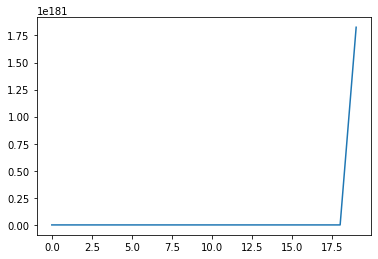

In [14]:
plt.plot(d[:,22])